In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time 
from Recoil_Spectrum import*

# import math
# import scipy.integrate as integrate
# import pandas as pd
# from pandas import DataFrame
# from scipy.interpolate import interp1d
# from xsc import*
# from Reactor_Flux import*

Loading neutrino fluxes for...
    DSNB
    atm
    hep
    8B
    15O
    17F
    pep
    13N
    pp
    7Be-384
    7Be-861
...done.


# 1.Cross Section - NC coherent
https://arxiv.org/abs/1608.01565

https://arxiv.org/abs/1906.05800

$$\frac{d \sigma}{dT} (E_\nu,T) = \frac{G_F^2}{8\pi} [Z(4\sin^2 \theta_{W}) + N]^2 M \left( 2 - \frac{MT}{E^2_\nu} \right) |f(q^2)|^2$$

*   T -> recoil energy
*   q -> transfered 4-momentum

Form factor (Helm nuclear form factor) from paledetectors paper

$$F(E_R) = f(q) = 3 \frac{\sin(qr_n) - qr_n\cos(qr_n)}{(qr_n)^3} e^{-(qs)^2/2}$$


*   Effective nuclear radius $r_n^2\approx c^2+\frac{7}{3} \pi^2 a^2 - 5s^2$, $a \approx 0.52 fm$, $c\approx (1.23Z^{1/3} -0.6)fm$, $s \approx 0.9 fm$


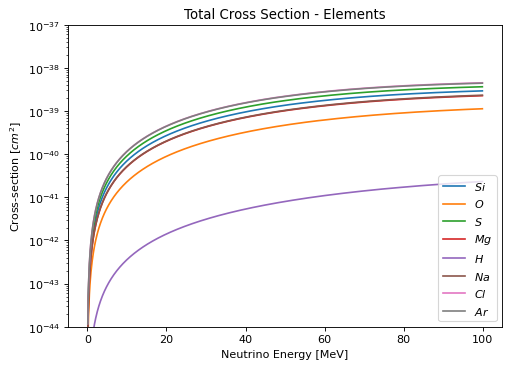

In [17]:
E_step=0.1
Enu_vec=np.arange(0.1, 100, E_step)# MeV

plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
#plt.subplot(1,2,1)
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,14,14),label=r'$Si$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,8,8),label=r'$O$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,16,16),label=r'$S$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,12,12),label=r'$Mg$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,1,1),label=r'$H$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,11,12),label=r'$Na$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,17,18),label=r'$Cl$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,18,18),label=r'$Ar$')
plt.xlabel(r'Neutrino Energy [MeV]')
plt.ylabel(r'Cross-section $[cm^2]$')
plt.title(r'Total Cross Section - Elements')
plt.yscale('log')
plt.ylim(10**-44,10**-37)
plt.legend()
plt.savefig("Figures/xsc_total_elements.png")

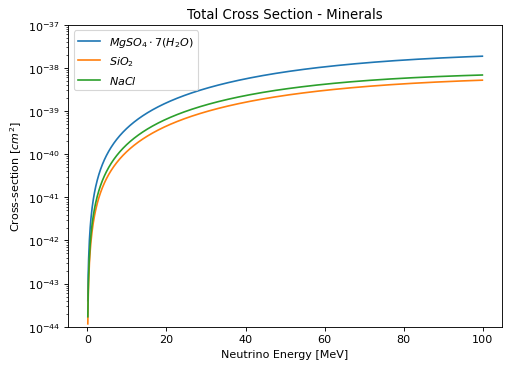

In [18]:
plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
#plt.subplot(1,2,2)
plt.plot(Enu_vec,CS_coherent_mineral_tot(Enu_vec,'MgSO4_7_H2O'),label=r'$MgSO_4\cdot7(H_2O)$')
plt.plot(Enu_vec,CS_coherent_mineral_tot(Enu_vec,'SiO2'),label=r'$SiO_2$')
plt.plot(Enu_vec,CS_coherent_mineral_tot(Enu_vec,'NaCl'),label=r'$NaCl$')
plt.xlabel(r'Neutrino Energy [MeV]')
plt.ylabel(r'Cross-section $[cm^2]$')
plt.title(r'Total Cross Section - Minerals')
plt.yscale('log')
plt.ylim(10**-44,10**-37)
plt.legend()
plt.savefig("Figures/xsc_total_minerals.png")

# 2.Antineutrino Reactor Spectrum

*   Angra antineutino showed in [The CONNIE experiment - CONNIE Collaboration](https://arxiv.org/abs/1608.01565)

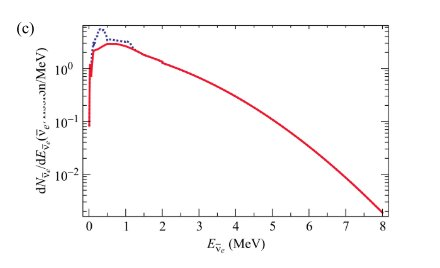

**About the Reactor Antineutrino Spectrum**

A good **review** on reactor antineutrinos, with a section about the spctrum, can be found in: https://www.annualreviews.org/doi/full/10.1146/annurev-nucl-101916-123318

Basically there is two **methods** to obtain the reactor antineutrino spectrum:


1.   **Inversion of $\beta$ spectrum:** transform a measured electron $\beta$ spectrum in a the neutrino spectrum. Uncertanties about 2%-7%.
2.   **Ab into calculations:** summation of the spectrum from all possible decay branches based on nuclear databases. Uncertanties about 10%.

For most of the works that uses the 1st method, the measured $\beta$ spectrum came from the ILL experiment (ref). 


The main two **models** for the ractor antineutrino spectrum are ($E_\nu>2MeV$):


1.   **ILL-Vogel model (Old):** Uses the inversion of $\beta$ spectrum measured at the ILL experiment for $^{235}\textrm{U}$,$^{239}\textrm{Pu}$ and $^{241}\textrm{Pu}$ istopes (main ones). The
$^{238}\textrm{U}$ contribution was obtained using *ab into* calculations by [P. Vogel](https://journals.aps.org/prc/abstract/10.1103/PhysRevC.24.1543).

2.   **Huber–Mueller model (New):** Higher accuracy $\beta$ inversion done by [P. Huber](https://arxiv.org/abs/1106.0687), considering higer order corrections, for the ILL  data ($^{235}\textrm{U}$,$^{239}\textrm{Pu}$ and $^{241}\textrm{Pu}$) - Uncertanty $\sim 2.4%$. A better *ab into* calculation for the $^{238}\textrm{U}$ was 
done by [Th. A. Muller](https://arxiv.org/abs/1101.2663).

All works cited above are made form $E_\nu>2MeV$,which is the interested regime for most reactor neutrinos experiments, given the inverse beta (IB) deacy threshold due to positron mass.

Results of *ab into* calculations for $E_\nu< 2MeV$ was done by [P.Vogel](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.39.3378). However, the paper does not explain clearly how it arrives in the given results as it does not give the uncertanties.


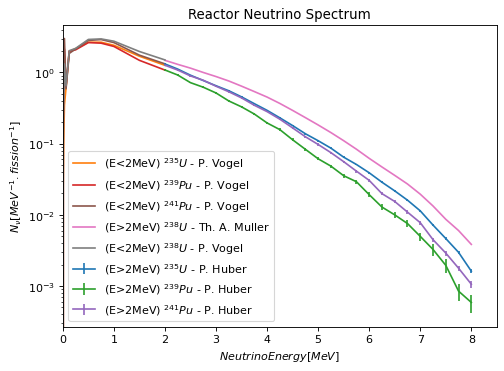

In [4]:
plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
#U235
plt.errorbar(E_P_Huber,Nu_U235_P_Huber,Nu_U235_P_Huber_error,label=r'(E>2MeV) $^{235}U$ - P. Huber')
plt.plot(E_less_2MeV,U_235_less_2MeV,label=r'(E<2MeV) $^{235}U$ - P. Vogel')
#Pu239
plt.errorbar(E_P_Huber,Nu_Pu239_P_Huber,Nu_Pu239_P_Huber_error,label=r'(E>2MeV) $ ^{239}Pu$ - P. Huber')
plt.plot(E_less_2MeV,Pu_239_less_2MeV,label=r'(E<2MeV) $^{239}Pu$ - P. Vogel')
#Pu241
plt.errorbar(E_P_Huber,Nu_Pu241_P_Huber,Nu_Pu241_P_Huber_error,label=r'(E>2MeV) $^{241}Pu$ - P. Huber')
plt.plot(E_less_2MeV,Pu_241_less_2MeV,label=r'(E<2MeV) $^{241}Pu$ - P. Vogel')
#U238
plt.plot(E_Muller,Nu_U238_Muller,label=r'(E>2MeV) $^{238}U$ - Th. A. Muller')
plt.plot(E_less_2MeV,U_238_less_2MeV,label=r'(E<2MeV) $^{238}U$ - P. Vogel')
#IB decay threshold
#plt.axvline(1.8, ls='--',c='r', label=r'(E=1.8MeV) Inverse $\beta$ threshold')
plt.title("Reactor Neutrino Spectrum")
plt.xlabel(r'$Neutrino Energy [MeV]$')
plt.ylabel(r'$N_\nu [MeV^{-1}. fission^{-1}]$')
plt.yscale('log')
plt.xlim([0, 8.5])
plt.legend()

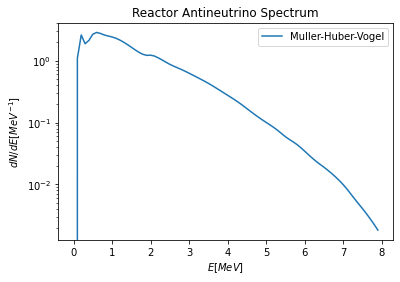

In [5]:
E_step=0.1
Enu_vec=np.arange(0, 8, E_step)# MeV

plt.plot(Enu_vec,dN_dE_Muller_Huber_Vogel_tot(Enu_vec),label='Muller-Huber-Vogel')
plt.xlabel(r'$E[MeV]$')
plt.ylabel(r'$dN/dE [MeV^{-1}]$')
plt.title(r'Reactor Antineutrino Spectrum')
plt.yscale('log')
plt.legend()

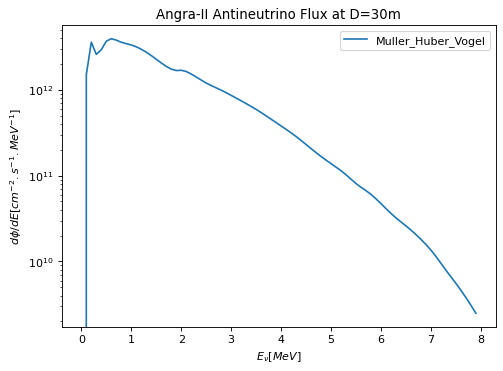

In [6]:
plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(Enu_vec,Flux_Muller_Huber_Vogel(Enu_vec),label='Muller_Huber_Vogel')
plt.xlabel(r'$E_\nu[MeV]$')
plt.ylabel(r'$d\phi/dE [cm^{-2}.s^{-1}.MeV^{-1}]$')
plt.title(r'Angra-II Antineutrino Flux at D=30m')
plt.yscale('log')
plt.legend()

# 3.Recoil Spectrum

In [2]:
T_step=0.0001
T_vec = np.logspace(-2, 1.3, 100, endpoint=True)#keV

R_Si02=[]
R_Si02_error=[]
R_MgSO4_7_H2O=[]
R_MgSO4_7_H2O_error=[]
R_NaCl=[]
R_NaCl_error=[]

start_time = time.time()
for T in T_vec:
  R_aux,R_error_aux = Recoil_spectrum(T*10**(-3),'SiO2') # T in MeV
  R_Si02.append(R_aux)
  R_Si02_error.append(R_error_aux)
  R_aux,R_error_aux = Recoil_spectrum(T*10**(-3),'MgSO4_7_H2O') # T in MeV
  R_MgSO4_7_H2O.append(R_aux)
  R_MgSO4_7_H2O_error.append(R_error_aux)
  R_aux,R_error_aux = Recoil_spectrum(T*10**(-3),'NaCl') # T in MeV
  R_NaCl.append(R_aux)
  R_NaCl_error.append(R_error_aux)
print("Took %s minutes" % ((time.time() - start_time)/60))

/home/pedro/Downloads/SN/Paleodetectors/Recoil_Spectrum.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Recoil=integrate.quad(lambda Enu: Event_rate(Enu,T,mineral),0,8,epsabs=1.49e-20) #s⁻¹MeV⁻¹g⁻¹


Took 9.703861057758331 minutes


In [4]:
# T_vec_lin = np.linspace(0.001,30,200) #keV
T_vec_log = np.logspace(-2, 1.3, 100, endpoint=True)#keV

atoms=["Si","O","S","Mg","H","Na","Cl"]
# R_atom_lin=[]
# R_atom_lin_error=[]
R_atom_log=[]
R_atom_log_error=[]

start_time = time.time()
for i in range(len(atoms)):
#   R_atom_lin.append([])
#   R_atom_lin_error.append([])
#   for T in T_vec_lin:
#     R_aux,R_error_aux = Recoil_spectrum_atom(T*10**(-3),atoms[i]) # T in MeV
#     R_atom_lin[i].append(R_aux)
#     R_atom_lin_error[i].append(R_error_aux)
  R_atom_log.append([])
  R_atom_log_error.append([])
  for T in T_vec_log:
    R_aux,R_error_aux = Recoil_spectrum_atom(T*10**(-3),atoms[i]) # T in MeV
    R_atom_log[i].append(R_aux)
    R_atom_log_error[i].append(R_error_aux)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 10.520145789782207 minutes


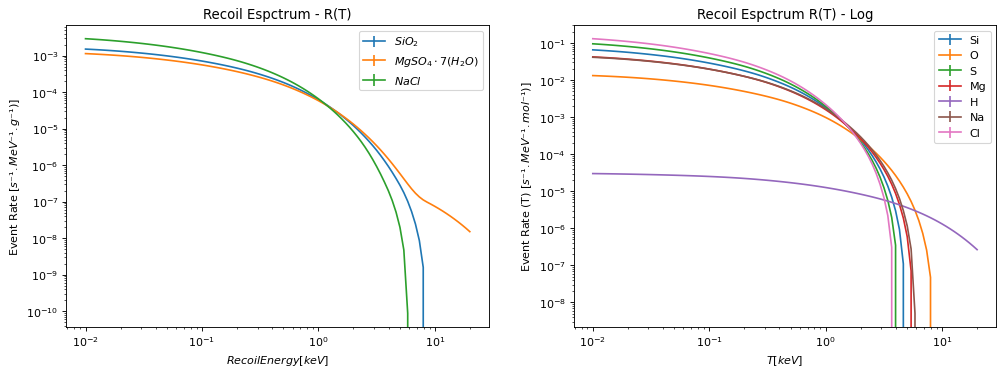

In [5]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.errorbar(T_vec,R_Si02,yerr=R_Si02_error,label='$SiO_2$')
plt.errorbar(T_vec,R_MgSO4_7_H2O,yerr=R_MgSO4_7_H2O_error,label=r'$MgSO_4 \cdot 7(H_2O)$')
plt.errorbar(T_vec,R_NaCl,yerr=R_NaCl_error,label=r'$NaCl$')
plt.xlabel(r'$Recoil Energy [keV]$')
plt.ylabel(r'Event Rate $[s⁻¹.MeV⁻¹.g⁻¹)]$')
plt.title("Recoil Espctrum - R(T)")
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(1,2,2)
for i in range(len(atoms)):
  plt.errorbar(T_vec_log,R_atom_log[i],yerr=R_atom_log_error[i],label='%s'%(atoms[i]))
plt.xlabel(r'$T[keV]$')
plt.ylabel(r'Event Rate (T) $[s⁻¹.MeV⁻¹.mol⁻¹)]$')
plt.title("Recoil Espctrum R(T) - Log")
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [2]:
T_step=0.0001
T_vec = np.logspace(-2, 2.3, 500, endpoint=True)#keV
nu_sources=["8B", "hep", "atm", "DSNB", "15O", "17F", "13N", "pp"]

minerals=['SiO2','MgSO4_7_H2O','NaCl']

Signal=[]
Signal_error=[]
Bkg=[]
Bkg_error=[]

for i in range(len(minerals)):
  Signal.append([])
  Signal_error.append([])
  Bkg.append([])
  Bkg_error.append([])
    
  #Bkg-neutrino from other sources
  for j in range(len(nu_sources)):
    start_time = time.time()
    Bkg[i].append([])
    Bkg_error[i].append([])
    for T in T_vec:
      R_aux,R_error_aux = Recoil_spectrum_nu_background(T*10**(-3),minerals[i],nu_sources[j])
      Bkg[i][j].append(R_aux)
      Bkg_error[i][j].append(R_error_aux)
    print(minerals[i],nu_sources[j])
    print("Took %s minutes" % ((time.time() - start_time)/60))
    
  #Bkg-neutrino total
  Bkg[i].append([])
  Bkg_error[i].append([])
  start_time = time.time()
  for T in T_vec:
    R_aux,R_error_aux = Recoil_spectrum_nu_background_total(T*10**(-3),minerals[i])
    Bkg[i][len(nu_sources)].append(R_aux)
    Bkg_error[i][len(nu_sources)].append(R_error_aux)
  print(minerals[i],'nu total')
  print("Took %s minutes" % ((time.time() - start_time)/60))
    
  #Reactor Neutrinos
  start_time = time.time()
  for T in T_vec:
    R_aux,R_error_aux = Recoil_spectrum(T*10**(-3),minerals[i]) # T in MeV
    Signal[i].append(R_aux)
    Signal_error[i].append(R_error_aux)
  print(minerals[i],'reactor')
  print("Took %s minutes" % ((time.time() - start_time)/60))

/home/pedro/Downloads/SN/Paleodetectors/Recoil_Spectrum.py:107: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Recoil=integrate.quad(lambda Enu: Event_rate_nu_background(Enu,T,mineral,source),Emin,Emax,epsabs=1.49e-20) #s⁻¹MeV⁻¹g⁻¹
/home/pedro/Downloads/SN/Paleodetectors/Recoil_Spectrum.py:107: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Recoil=integrate.quad(lambda Enu: Event_rate_nu_background(Enu,T,mineral,source),Emin,Emax,epsabs=1.49e-20) #s⁻¹MeV⁻¹g⁻¹


SiO2 8B
Took 4.214350950717926 minutes


/home/pedro/Downloads/SN/Paleodetectors/Recoil_Spectrum.py:107: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Recoil=integrate.quad(lambda Enu: Event_rate_nu_background(Enu,T,mineral,source),Emin,Emax,epsabs=1.49e-20) #s⁻¹MeV⁻¹g⁻¹


SiO2 hep
Took 4.3020108342170715 minutes
SiO2 atm
Took 5.577618976434072 minutes
SiO2 DSNB
Took 4.971342833836873 minutes
SiO2 15O
Took 1.80139666001002 minutes
SiO2 17F
Took 1.628391190369924 minutes
SiO2 13N
Took 1.333416493733724 minutes
SiO2 pp
Took 0.334893266359965 minutes
SiO2 nu total
Took 22.678407589594524 minutes
SiO2 reactor
Took 8.994510936737061 minutes
MgSO4_7_H2O 8B
Took 8.29427611430486 minutes
MgSO4_7_H2O hep
Took 7.801856768131256 minutes
MgSO4_7_H2O atm
Took 10.006962009270985 minutes
MgSO4_7_H2O DSNB
Took 8.728530780474346 minutes
MgSO4_7_H2O 15O
Took 4.1549023548762 minutes
MgSO4_7_H2O 17F
Took 4.063524067401886 minutes
MgSO4_7_H2O 13N
Took 3.547462519009908 minutes
MgSO4_7_H2O pp
Took 1.8112514694531758 minutes
MgSO4_7_H2O nu total
Took 48.08198226292928 minutes


/home/pedro/Downloads/SN/Paleodetectors/Recoil_Spectrum.py:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Recoil=integrate.quad(lambda Enu: Event_rate(Enu,T,mineral),0,8,epsabs=1.49e-20) #s⁻¹MeV⁻¹g⁻¹


MgSO4_7_H2O reactor
Took 15.771132973829905 minutes
NaCl 8B
Took 3.728130237261454 minutes
NaCl hep
Took 3.781886370976766 minutes
NaCl atm
Took 5.085577209790547 minutes
NaCl DSNB
Took 4.49850165049235 minutes
NaCl 15O
Took 1.4702500224113464 minutes
NaCl 17F
Took 1.4481709480285645 minutes
NaCl 13N
Took 1.1505663593610127 minutes
NaCl pp
Took 0.18182630936304728 minutes
NaCl nu total
Took 21.265745349725087 minutes
NaCl reactor
Took 8.550899271170298 minutes


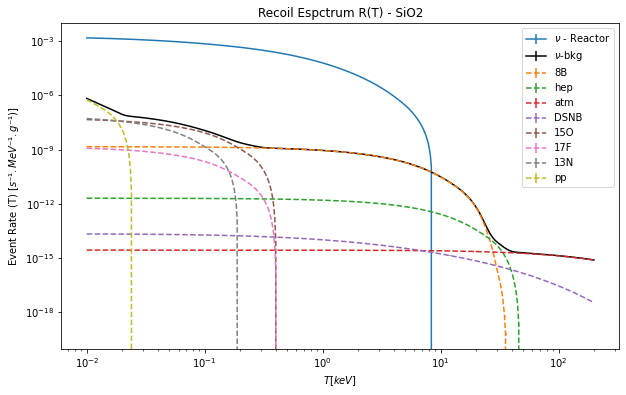

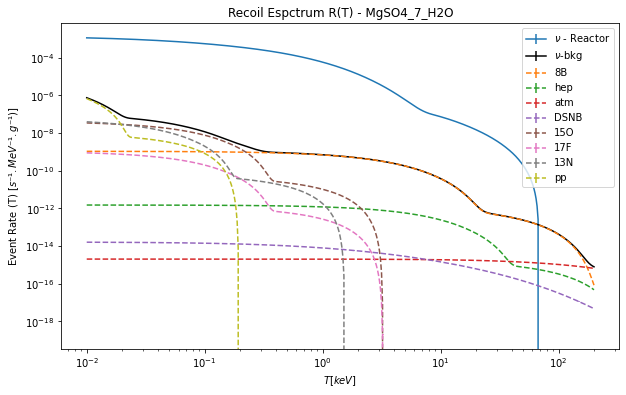

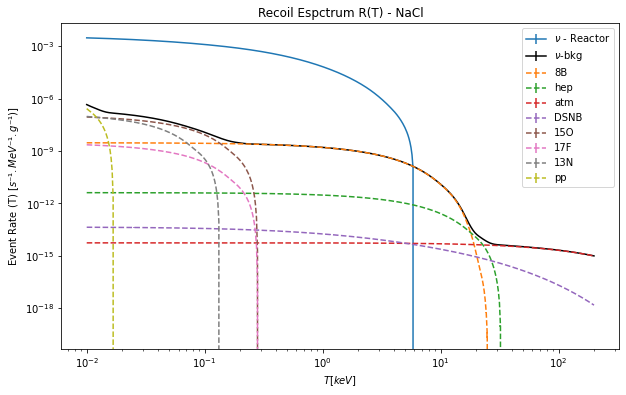

In [3]:
for i in range(len(minerals)):
  plt.figure(figsize=(10, 6))
  plt.errorbar(T_vec,Signal[i],yerr=Signal_error[i],label=r'$\nu$ - Reactor')
  plt.errorbar(T_vec,Bkg[i][len(nu_sources)],yerr=Bkg_error[i][len(nu_sources)],c='black',label=r'$\nu$-bkg')
  for j in range(len(nu_sources)): 
    plt.errorbar(T_vec,Bkg[i][j],yerr=Bkg_error[i][j],ls='--',label=r'%s'%(nu_sources[j]))
  plt.xlabel(r'$T[keV]$')
  plt.ylabel(r'Event Rate (T) $[s⁻¹.MeV⁻¹.g⁻¹)]$')
  plt.title("Recoil Espctrum R(T) - %s"%(minerals[i]))
  plt.xscale('log')
  plt.yscale('log')
  plt.legend()